In [1]:
# importing library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
house_data = pd.read_csv("Bengaluru_House_Data.csv")
house_data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
house_data.shape

(13320, 9)

In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#Checking Area type
house_data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
# Drop unnecessary columns
house_data.drop(['area_type','society', 'balcony','availability'],inplace=True, axis='columns')
house_data.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
house_data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Removing missing values
house_data.dropna(inplace=True)
house_data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
house_data.shape

(13246, 5)

In [10]:
house_data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# Cleaning size column for mutiple occurences for same info
house_data['bhk'] = house_data['size'].apply(lambda x: int(x.split(' ')[0]))

In [12]:
house_data.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
# bhk unique values
house_data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
#house with more than 20 bhk
house_data[house_data['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
house_data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# creating function to check range values like 1133-1384
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
# total_sqft with range values
house_data[~house_data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
# creating function to converting range value 
# like 1133-1384 to float value like 1150.0
def convert_sqrt_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None


In [19]:
print(convert_sqrt_to_num('2166'))
print(convert_sqrt_to_num('2100 - 2850'))
print(convert_sqrt_to_num('34 Sqrt Meter'))

2166.0
2475.0
None


In [20]:
# converting range value in total_sqft column
house_data['total_sqft'] = house_data['total_sqft'].apply(convert_sqrt_to_num)
house_data.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


## Feature Engineering

In [21]:
house_data['price_per_sqft'] = house_data['price']*100000/house_data['total_sqft']
house_data.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7585,Sarjapur Road,2 BHK,914.0,2.0,32.00,2,3501.094092
10611,"Panathur Road,",1 BHK,936.0,1.0,53.00,1,5662.393162
9499,Begur Road,2 BHK,1240.0,2.0,45.88,2,3700.000000
687,Lingadheeranahalli,3 BHK,1683.0,3.0,109.00,3,6476.530006
10698,Hosahalli Extension,6 Bedroom,1350.0,4.0,203.00,6,15037.037037
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.00,4,28571.428571
2061,Jakkur,2 BHK,1100.0,2.0,53.35,2,4850.000000
1887,New Gurappana Palya,7 BHK,600.0,7.0,106.00,7,17666.666667
4903,Brookefield,3 BHK,1420.0,3.0,85.00,3,5985.915493
11406,Electronic City,2 BHK,1125.0,2.0,32.49,2,2888.000000


In [22]:
# unique location count
len(house_data['location'].unique())

1304

In [23]:
# location wise count
house_data['location'] = house_data['location'].apply(lambda x: x.strip())
location_stats = house_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
# less than 10 houses in same location
len(location_stats[location_stats<=10])

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
len(house_data.location.unique())

1293

In [27]:
# changing location names 
# with less than 10 house in same location
house_data['location'] = house_data['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(house_data['location'].unique())
house_data.head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
# bhk with less than 300 sqft area
house_data[house_data['total_sqft']/house_data['bhk']<300].head(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
# removing bhk less than 300
house_data = house_data[~(house_data['total_sqft']/house_data['bhk']<300)]
house_data.shape

(12502, 7)

In [30]:
house_data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pricepersqft_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

data = remove_pricepersqft_outliers(house_data)
data.shape

(10241, 7)

In [32]:
data.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1590,Channasandra,3 BHK,1310.0,2.0,45.0,3,3435.114504
2166,Electronic City,3 BHK,1500.0,2.0,64.5,3,4300.000000
2791,Harlur,2 BHK,1370.0,2.0,88.0,2,6423.357664
6596,Thanisandra,2 BHK,1111.0,2.0,50.0,2,4500.450045
8850,other,2 BHK,1070.0,2.0,38.9,2,3635.514019


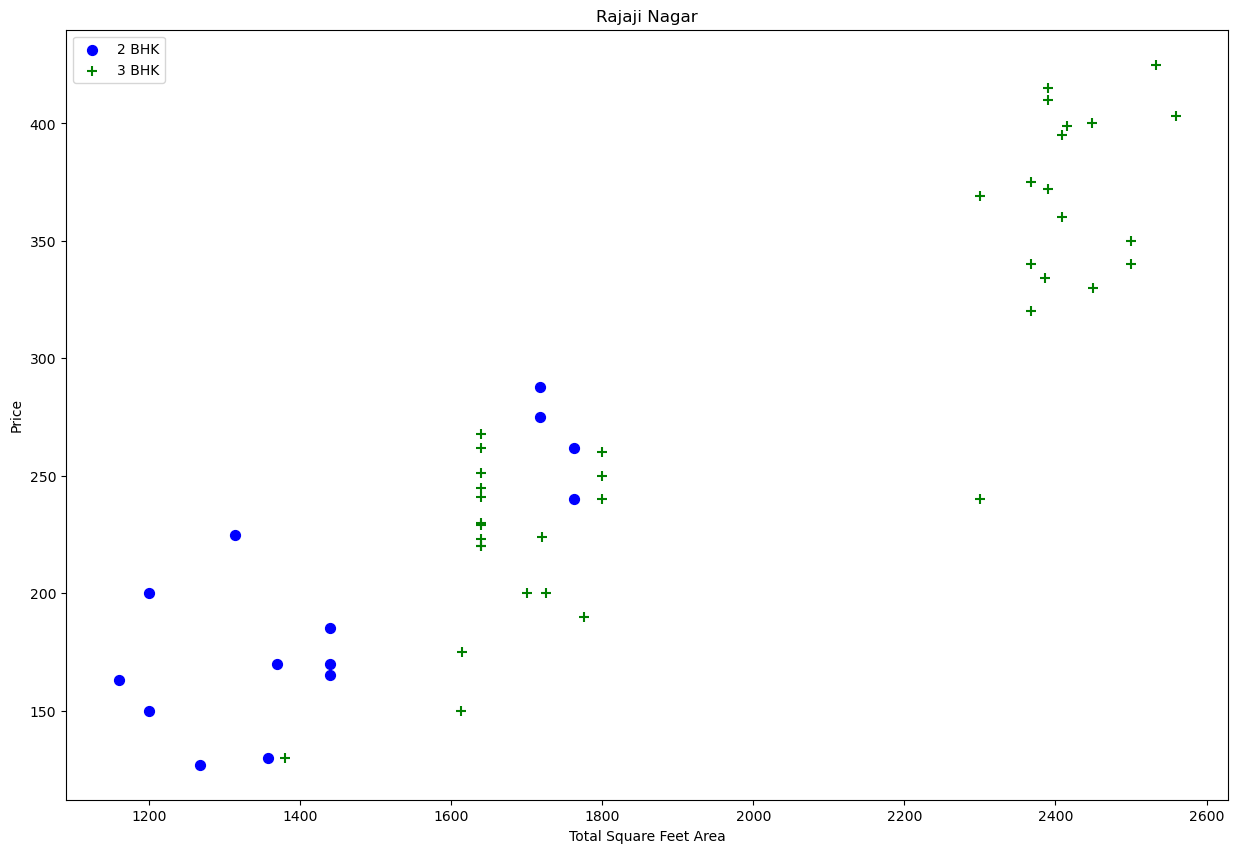

In [33]:
# ploting chart with location and bhk
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location']==location) & (df['bhk']==2)]
    bhk3 = df[(df['location']==location) & (df['bhk']==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50, marker='+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"Rajaji Nagar")

- There are some house with 3 bhk flats and there prices are less than 2 bhk flats and vice versa
- so we will remove these type of values these are considered outliers

In [34]:
# creating a function to remove outlier
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df, in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

data = remove_bhk_outliers(data)
data.shape

(7329, 7)

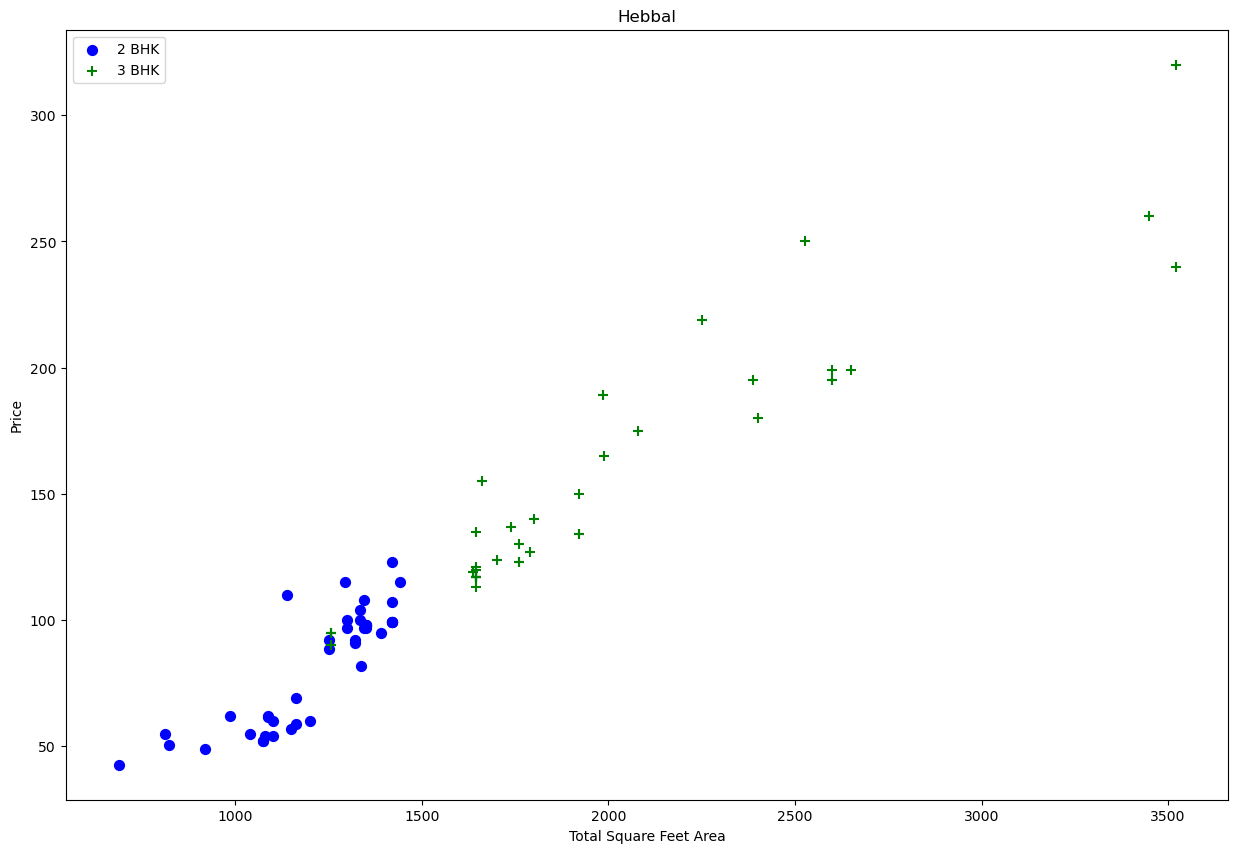

In [35]:
plot_scatter_chart(data, "Hebbal")

- There are still some outliers present in dataset but we can leave them

Text(0, 0.5, 'Count')

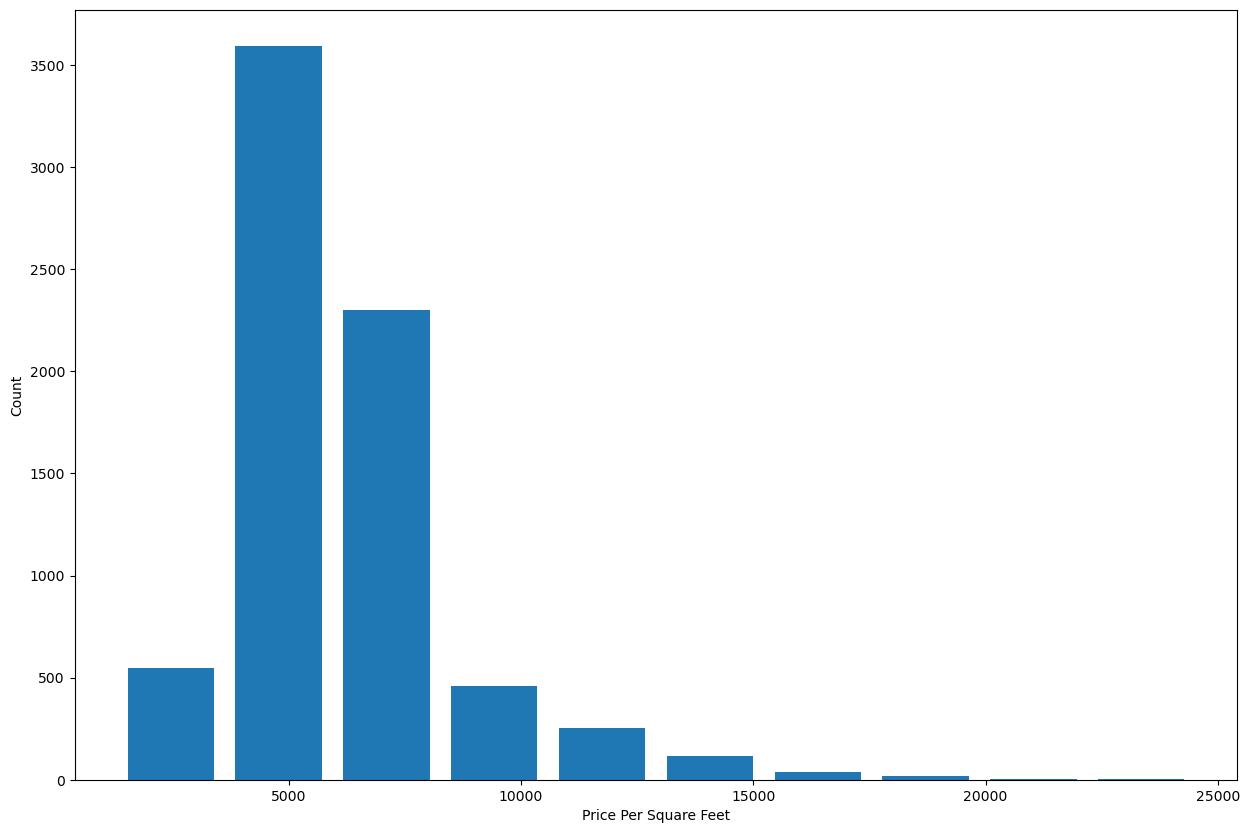

In [36]:
plt.hist(data.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [37]:
#unique bath numbers
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [38]:
data[data.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

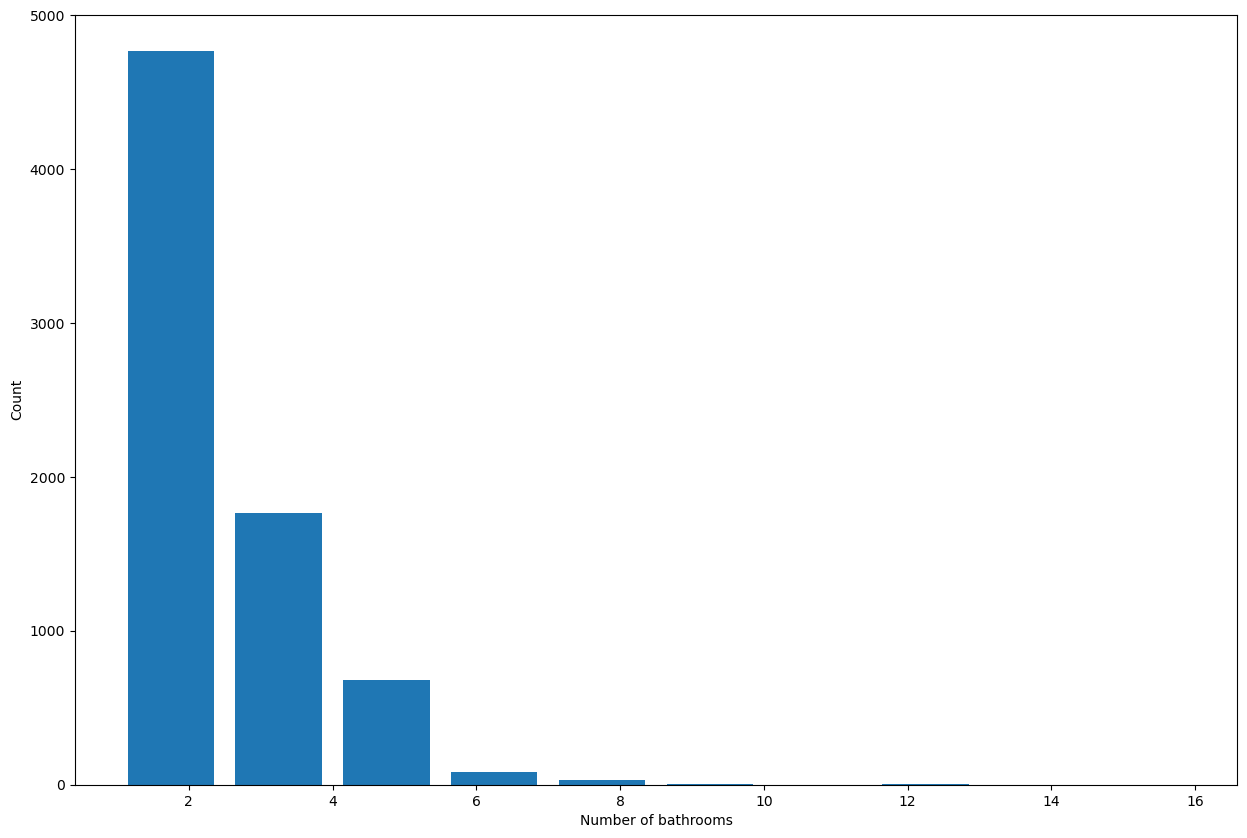

In [39]:
plt.hist(data.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [40]:
#house with more baths than bedrooms
data[data['bath']>data['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [41]:
data = data[data.bath<data.bhk+2]
data.shape

(7251, 7)

In [42]:
data = data.drop(['size','price_per_sqft'], axis='columns')
data.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## Model Building

In [43]:
X = data.drop('price', axis='columns')
X.head()

,location,total_sqft,bath,bhk
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2


In [44]:
y = data.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [45]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [47]:
print(X_train.shape)
print(X_test.shape)

(5800, 4)
(1451, 4)


In [48]:
# Apply Linear Regression
column_transform = make_column_transformer((OneHotEncoder(sparse=False),['location']), remainder='passthrough')
scaler = StandardScaler()
lr = LinearRegression()
pipe_lr = make_pipeline(column_transform, scaler, lr)
pipe_lr.fit(X_train,y_train)

c:\Users\might\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [49]:
ypred_lr = pipe_lr.predict(X_test)

In [50]:
r2_score(y_test,ypred_lr)

0.8453189724960792

In [51]:
# Apply Lasso
lasso = Lasso()
pipe_lasso = make_pipeline(column_transform, scaler, lasso)
pipe_lasso.fit(X_train,y_train)

c:\Users\might\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [52]:
ypred_lasso = pipe_lasso.predict(X_test)
r2_score(y_test,ypred_lasso)

0.8315426983817272

In [53]:
# Applyingn Ridge Model
ridge = Ridge()
pipe_ridge = make_pipeline(column_transform,scaler, ridge)
pipe_ridge.fit(X_train,y_train)

c:\Users\might\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [54]:
ypred_ridge = pipe_ridge.predict(X_test)
r2_score(y_test,ypred_ridge)

0.8452199246311685

In [55]:
print("Linear Regression: ", r2_score(y_test,ypred_lr))
print("Lasso: ", r2_score(y_test,ypred_lasso))
print("Ridge: ", r2_score(y_test,ypred_ridge))

Linear Regression:  0.8453189724960792
Lasso:  0.8315426983817272
Ridge:  0.8452199246311685


In [56]:
import pickle

In [57]:
pickle.dump(pipe_lr, open('Linear_Model.pkl','wb'))

In [59]:
import os
# Assuming the file is in a subdirectory named "models"
file_path = os.path.join('models',"Linear_Model.pkl")

if os.path.exists(file_path):
    with open(file_path, 'rb') as f:
        linear_model = pickle.load(f)
else:
    print("Error: Model file not found. Please create the model file first.")

In [60]:
def predict_price(location,bedroom,bath,total_sqft):
    prediction = linear_model.predict([[location,bedroom,bath,total_sqft]])
    print(prediction)
    return prediction

In [63]:
predict_price("Rajaji Nagar",1000,2,2)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames